In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\AFNANKHAN\Videos\spam.csv", encoding='latin1')

In [3]:
columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']
df = df.drop(columns=columns)

In [4]:
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)

In [5]:
df = df.drop_duplicates(keep='first')

In [6]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
le.fit_transform(df["target"]) 

df["target"] = le.fit_transform(df["target"])

In [7]:
df.head(3)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...


# EDA

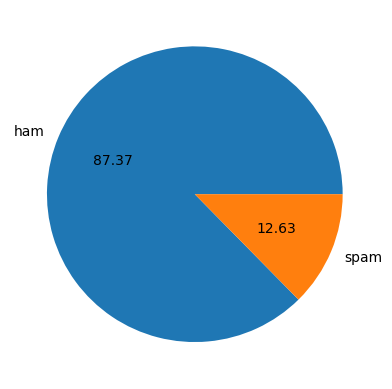

In [9]:

plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [10]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

In [11]:
# Calculate the number of characters in each text entry
df['num_characters'] = df['text'].apply(len)

# Calculate the number of words in each text entry using NLTK's word_tokenize
df['num_word'] = df['text'].apply(lambda x: len(word_tokenize(x)))

# Calculate the number of sentences in each text entry using NLTK's sent_tokenize
df['num_sentence'] = df['text'].apply(lambda x: len(sent_tokenize(x)))


In [12]:
df.head(4)

,target,text,num_characters,num_word,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1


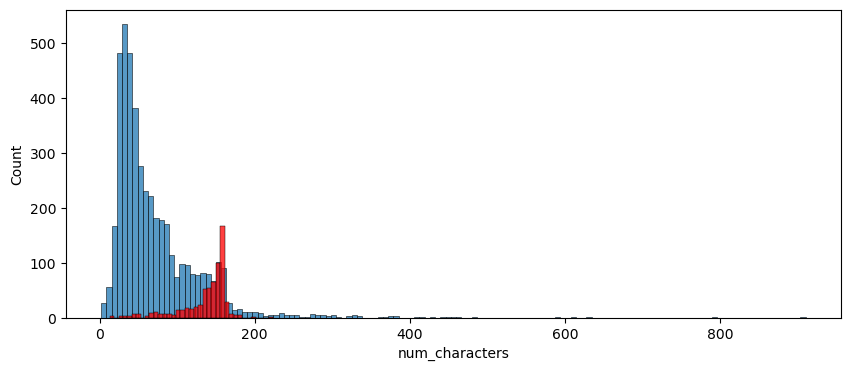

In [13]:
# Set figure size
plt.figure(figsize=(10, 4))

# Plot histograms
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color= 'red')

# Show plot
plt.show()

# isse ye pta chalta he spma magssege chhota hota he compare to ham massege

# DATA PREPROCESSING

In [16]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Stop words ko set mein convert karna
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()  # Stemming ke liye Porter Stemmer

def clean_text(text):
    text = text.lower()  # Text ko lowercase mein convert karo
    text = re.sub(r'\d+', '', text)  # Digits hatao
    text = re.sub(r'[^\w\s]', '', text)  # Punctuation hatao
    text = re.sub(r'\s+', ' ', text)  # Extra spaces hatao
    text = ' '.join([ps.stem(word) for word in text.split() if word not in stop_words])  # Stopwords hatao aur stemming apply karo
    return text

# Apply cleaning function on the specific column (e.g., 'v2')
df['text'] = df['text'].apply(clean_text)

# ye dekhege ki kon kon se maggese zyada bar aaye he worldcloud se

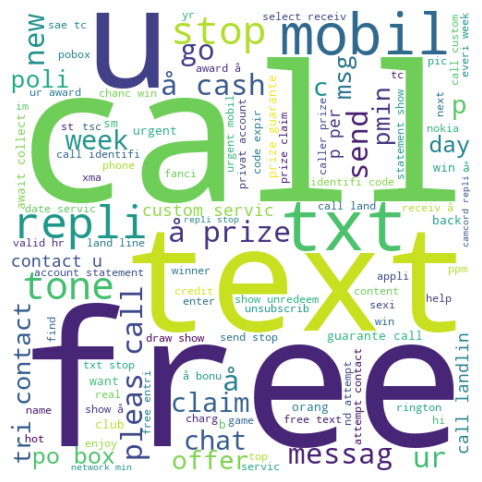

In [18]:
from wordcloud import WordCloud

# WordCloud ka object banaiye
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

# Target 1 ke transformed text ko ek string mein convert karke word cloud generate karein
spam_wc = wc.generate(' '.join(df[df['target'] == 1]['text']))

plt.figure(figsize=(9, 6))  # Adjust figure size for better view
plt.imshow(spam_wc, interpolation='bilinear')  # Smooth display
plt.axis('off')  # Axis ko hide karein
plt.show()

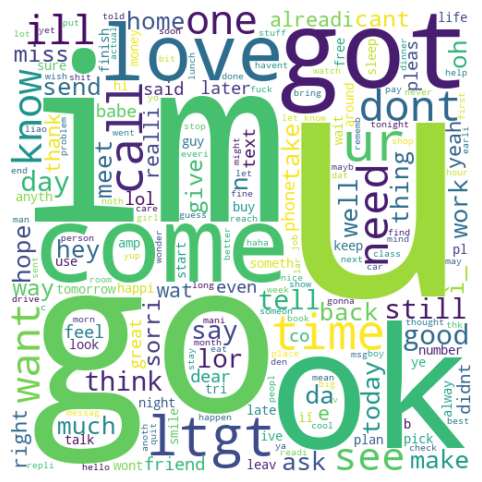

In [19]:
# WordCloud ka object banaiye
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

# Target 1 ke transformed text ko ek string mein convert karke word cloud generate karein
spam_wc = wc.generate(' '.join(df[df['target'] == 0]['text']))

plt.figure(figsize=(9, 6))  # Adjust figure size for better view
plt.imshow(spam_wc, interpolation='bilinear')  # Smooth display
plt.axis('off')  # Axis ko hide karein
plt.show()

# MODEL BUILDING

In [21]:
x = df.drop(['target'], axis=1)  
y = df['target'] 

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer with max_features
cv = CountVectorizer(max_features=1000)  # For example, top 1000 features

# Transform text data using CountVectorizer
X = cv.fit_transform(df['text']).toarray()

print(X)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [23]:
from sklearn.model_selection import train_test_split

# Data ko train aur test split mein divide karna
X_train, X_test, y_train, y_test = train_test_split(X, df['target'], test_size=0.2, random_state=2)


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

# Logistic Regression Model
Lr = LogisticRegression()
Lr.fit(X_train, y_train)

# Predictions
y_pred = Lr.predict(X_test)

# Accuracy on Test Data
test_accuracy = accuracy_score(y_test, y_pred) * 100

# Accuracy on Train Data
train_accuracy = accuracy_score(y_train, Lr.predict(X_train)) * 100

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Precision Score (use 'weighted' for multi-class classification)
precision = precision_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Test Accuracy: {test_accuracy:.2f}%")
print(f"Train Accuracy: {train_accuracy:.2f}%")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Precision Score: {precision:.2f}")


Test Accuracy: 97.78%
Train Accuracy: 98.81%
Confusion Matrix:
[[893   3]
 [ 20 118]]
Precision Score: 0.98


In [25]:
from imblearn.under_sampling import RandomUnderSampler

ru = RandomUnderSampler()
ru_x, ru_y = ru.fit_resample(X, y)

ru_y.value_counts()




from imblearn.over_sampling import RandomOverSampler

ro = RandomOverSampler()
ro_x, ro_y = ro.fit_resample(X, y)

ro_y.value_counts()


target
0    4516
1    4516
Name: count, dtype: int64

In [29]:
import pickle
pickle.dump(cv,open("CountVectorizer.pkl", "wb"))
pickle.dump(Lr,open("model.pkl", "wb"))